In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
dataset_train.shape

(1258, 6)

In [4]:
training_set=dataset_train.iloc[:,1:2].values

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [8]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

In [48]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [49]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
#Reshape to 3 Dimensions- No of Stock Prices, No of Timestamps, No of Indicators

In [12]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [13]:
#Building The RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\jaska\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jaska\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jaska\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jaska\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [14]:
regressor=Sequential()

In [15]:
#Adding First LSTM Layer and Some Dropout Regularization
regressor.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [16]:
#Adding Second LSTM Layer and Some Dropout Regularization
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

In [17]:
#Adding Third LSTM Layer and Some Dropout Regularization
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

In [23]:
#Adding Fourth LSTM Layer and Some Dropout Regularization
regressor.add(LSTM(50, return_sequences=False))
regressor.add(Dropout(0.2))

In [24]:
#Adding the Output Layer
regressor.add(Dense(1))
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)           

C:\Users\jaska\anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [25]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#Fitting the RNN to the Training Set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.1170
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0126
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0083
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0070
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0071A: 0s - loss: 0.
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0069
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0065
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [==============================] -

1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 98/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0017


In [27]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [28]:
dataset_test.shape


(20, 6)

In [30]:
real_stock_price=dataset_test.iloc[:,1:2].values


In [31]:
#Getting the Predicted stock Price of 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
dataset_total.shape

(1278,)

In [32]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values


In [33]:
inputs.shape

(80,)

In [35]:
inputs=inputs.reshape(-1,1)

In [36]:
inputs.shape

(80, 1)

In [37]:
inputs=sc.transform(inputs)

In [38]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

In [39]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [41]:
predicted_stock_price=regressor.predict(X_test)

In [42]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

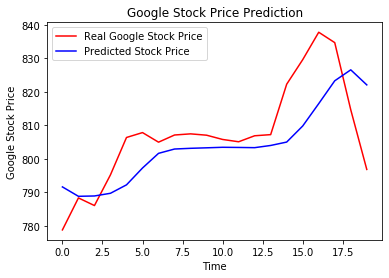

In [45]:
#Visualising The Results
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()

In [46]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [47]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"
